<a href="https://colab.research.google.com/github/thalitaoo/mvpthalita/blob/main/MVP_Thalita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importar bibliotecas
import pandas as pd



In [9]:
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [10]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

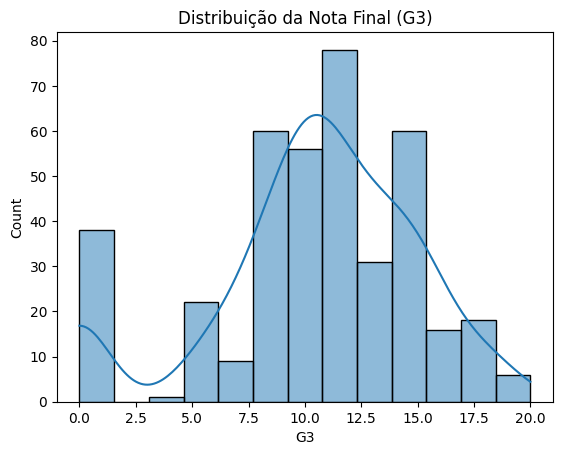

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['G3'], kde=True)
plt.title('Distribuição da Nota Final (G3)')
plt.show()


In [13]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()



ValueError: could not convert string to float: 'GP'

In [14]:
print(data.dtypes)


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [15]:
data_encoded = pd.get_dummies(data, drop_first=True)


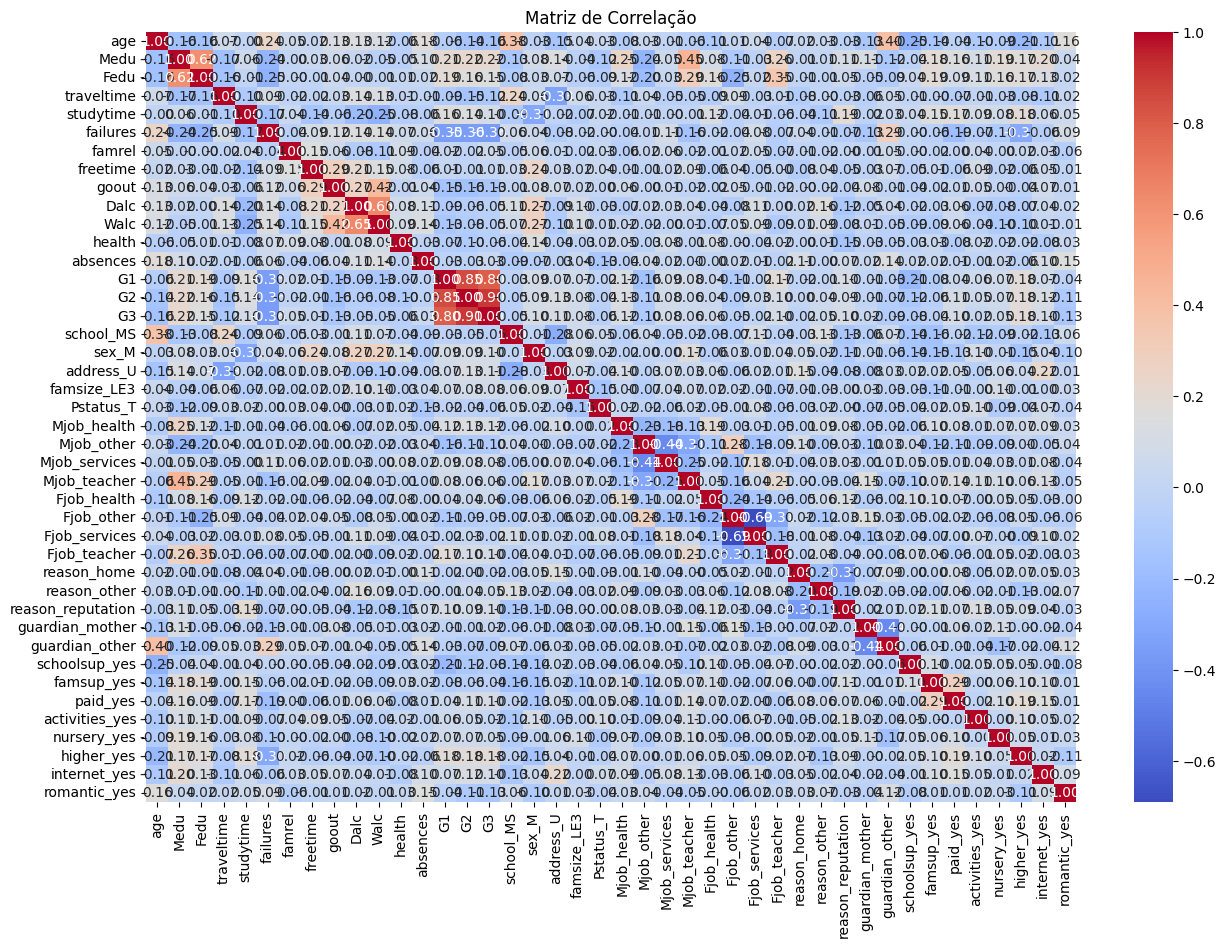

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Converter colunas categóricas para numéricas
data_encoded = pd.get_dummies(data, drop_first=True)

# 2. Calcular e plotar a matriz de correlação
correlation_matrix = data_encoded.corr()

# 3. Plotar a matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [5]:
# Link para o arquivo no GitHub ou UCI (depois de hospedá-lo no seu repositório)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student-mat.csv'

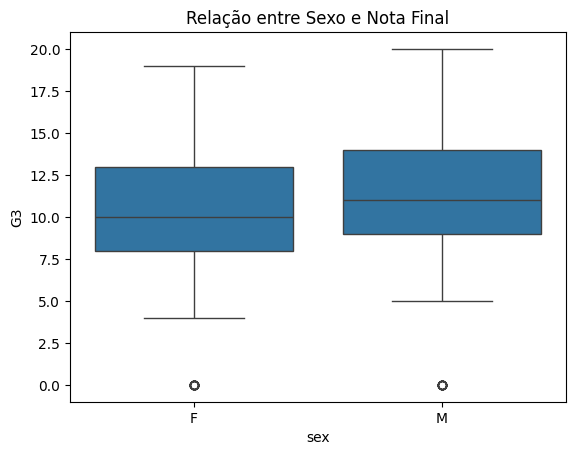

In [18]:
sns.boxplot(x='sex', y='G3', data=data)
plt.title('Relação entre Sexo e Nota Final')
plt.show()


In [19]:
# Excluir colunas que não são úteis para o modelo
data = data.drop(['school', 'G1', 'G2'], axis=1)


In [20]:
data = pd.get_dummies(data, drop_first=True)


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Separar variáveis independentes (X) e dependente (y)
X = data_encoded.drop('G3', axis=1)  # Supondo que 'G3' seja a variável alvo
y = data_encoded['G3']

# 2. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Treinar o modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 4. Avaliar o modelo
y_pred = lr_model.predict(X_test)
print("Modelo treinado com sucesso!")
from sklearn.model_selection import train_test_split

# Separar variáveis dependente e independentes
X = data_encoded.drop('G3', axis=1)  # Supondo que 'G3' seja a variável alvo
y = data_encoded['G3']

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Modelo treinado com sucesso!


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")


MSE: 5.656642833231222
R²: 0.7241341236974022


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Árvore de Decisão
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)


Melhores parâmetros: {'max_depth': 10, 'n_estimators': 200}


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Previsão com Random Forest
y_pred = rf_model.predict(X_test)

# Cálculo das métricas
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


RMSE: 1.9487730641858232
MAE: 1.1645569620253164
R²: 0.8147911386865877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
import requests
import zipfile
import io

# URL do dataset compactado
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

# Fazer o download
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()  # Extrai os arquivos no diretório atual

# Carregar o arquivo CSV
data = pd.read_csv('student-mat.csv', sep=';')
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
